# Heston Model Generator

In [32]:
import numpy as np
import torch as torch
import matplotlib.pyplot as plt

In [33]:
class hestonGenerator:
    def __init__(self,
                 S0 = 100,              # the initial asset price
                 v0 = 0.04,             # the initial volatility
                 r = 0,                 # the risk-free rate
                 theta = 0.04,          # the long-term price variance
                 kappa = 1,             # the rate of reversion to theta
                 xi = 2,                # the volatility of sqrt(V_t)  
                 rho = -0.7,            # the correlation of Brownian motions
                 T = 1,                 # Time period
                 numTradingDays = 100,  # number of trading days
                 numBatches = 10,      
                 batchSize = 128):
        
        self.S0 = S0
        self.v0 = v0
        self.r = r
        self.theta = theta
        self.kappa = kappa
        self.xi = xi
        self.rho = rho
        self.T = T
        self.numTradingDays = numTradingDays
        
        self.batchNo = 0
        self.batchSize = batchSize
        self.numBatches = numBatches
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.batchNo >= self.numBatches:
            raise StopIteration()
        self.batchNo += 1
        
        # Heston Model Paths generated by two Brownian Motions
        dt = self.T / self.numTradingDays
        size = (self.batchSize, self.numTradingDays + 1)
        prices = np.zeros(size)
        vols = np.zeros(size)
        S_t = self.S0
        v_t = self.v0
        prices[:,0] = S_t
        vols[:,0] = v_t
        for t in range(1, self.numTradingDays + 1):
            W_t = np.random.multivariate_normal(np.array([0,0]),
                                        cov = np.array([[1, self.rho],[self.rho, 1]]),
                                        size = self.batchSize) * np.sqrt(dt)
            
            S_t = S_t * (np.exp((self.r - v_t/2)*dt + np.sqrt(v_t)*W_t[:,0]))
            v_t = np.abs(v_t + self.kappa*(self.theta - v_t)*dt + self.xi*np.sqrt(v_t)*W_t[:,1])
            prices[:,t] = S_t
            vols[:,t] = v_t

        return torch.from_numpy(prices).type(torch.FloatTensor)

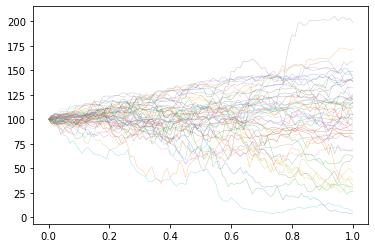

In [40]:
batchSize = 50

for S in hestonGenerator(batchSize = batchSize):
    pass
for i in range(batchSize):
    #print(np.shape(S[i,:]))
    plt.plot(np.linspace(0,1,100 + 1), S[i,:], alpha = 0.5, linewidth = 0.4)
plt.show()